## Chapter 2
# Musical Signals

### Taylor Series for Sine and Cosine

The Taylor series expansions for $\sin$ and $\cos$ are

$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$

and

$\cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots$,

where $x$ is a real number in radians.

Let's implement these:

In [1]:
import numpy as np
from scipy.special import factorial # factorial over numpy arrays

series_indices = np.arange(0, 1000)
even_series_indices = series_indices[::2]
odd_series_indices = series_indices[1::2]
alternating_signs = np.tile([1, -1], series_indices.size // 2)

# These default numbers of terms come from experimentation.
# They are chosen to make the results of `sin(1)` match exactly with `numpy.sin(1)`.
def sin(x, terms=9):
    return ((x ** odd_series_indices[:terms] / factorial(odd_series_indices[:terms])) * alternating_signs[:terms]).sum()

def cos(x, terms=11):
    # I found with experimentation that writing with the `1` term pulled out front
    # matches better with numpy.
    return 1 + ((x ** even_series_indices[1:terms] / factorial(even_series_indices[1:terms])) * alternating_signs[1:terms]).sum()

In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline
from ipython_animation import create_animation

xs = np.linspace(-5 * np.pi, 5 * np.pi, 100)
fig = plt.figure(figsize=(8, 6))
sin_line, = plt.plot(xs, [sin(x) for x in xs], label='$\sin$')
cos_line, = plt.plot(xs, [sin(x) for x in xs], label = '$\cos$')

plt.ylim([-2, 2])
plt.xlabel('$x$')
plt.ylabel('$\sin$ $x$')
plt.legend(loc='upper center')

def animate(frame):
    terms = frame + 1
    cos_line.set_ydata([cos(x, terms=terms) for x in xs])
    sin_line.set_ydata([sin(x, terms=terms) for x in xs])
    plt.title('Taylor series approximation of $\sin$ and $\cos$ with %i terms' % terms, size=14)

create_animation(fig, plt, animate, length_seconds=4, frames_per_second=4)

It turns out that 9 expansion terms is matches `numpy`'s values _exactly_!

In [3]:
assert(sin(1) == np.sin(1))

In [4]:
assert(cos(1) == np.cos(1))

... but less than 9 terms starts to diverge:

In [5]:
cos(1, terms=8) - np.cos(1)

-4.7739590058881731e-14

### Euler's Formula

The Taylor expansion of $e$ and $e^x$ are

$e = \sum_\limits{n=0}^\limits{\infty}\frac{1}{n!} = \frac{1}{0!}+\frac{1}{1!} + \frac{1}{2!}+\cdots$

$e^x = 1 + \sum_\limits{n=1}^\limits{\infty}\frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!}+\cdots$.

In [6]:
# Similarly, I found that pulling out the first two terms explicitly and 
# using 9 * 2 + 1 = 19 total terms here makes the results of both `exp(1)` and `exp(1j)`
# match exactly with numpy.
# (Only 18 terms are needed for and input of `1` to match exactly).
def exp(x, terms=20):
    return 1 + x + ((x ** series_indices[2:terms] / factorial(series_indices[2:terms])) ).sum()

In [7]:
assert(np.exp(1) == exp(1))

This looks really close to a combination of the Taylor expansions for $\sin$ and $\cos$:

$\cos x + \sin x = 1 + x - \frac{x^2}{2!} - \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} - \frac{x^6}{6!} - \frac{x^7}{7!} + \cdots$

Notice that the signs show a repeating pattern: $+,+,-,-,+,+,-,-$.

The powers of $i$ have the same periodicity of signs:

$\begin{align}
i^0 &= 1 &+\\
i^1 &= i &+\\
i^2 &= -1 &-\\
i^3 &= -i &-\\
i^4 &= 1 &+\\
i^5 &= i &+\\
&\vdots &\vdots
\end{align}$

Thus if we modify the expansion of $e^x$ to be $e^{iz}$, we get:

$\begin{align}e^{iz} &= 1 + \frac{iz}{1!} + \frac{i^2z^2}{2!} + \frac{i^3z^3}{3!} + \frac{i^4z^4}{4!} + \frac{i^5z^5}{5!} + \frac{i^6z^6}{6!} + \frac{i^7z^7}{7!} + \cdots\\
&= 1 + \frac{iz}{1!} - \frac{z^2}{2!} - \frac{iz^3}{3!} + \frac{z^4}{4!} + \frac{iz^5}{5!} - \frac{z^6}{6!} - \frac{iz^7}{7!} + \cdots
\end{align}$.

Grouping the even exponents (which are all real) and odd exponents (which all contain $i$),

$\begin{align}e^{iz} &= 1 - \frac{z^2}{2!} + \frac{z^4}{4!} - \frac{z^6}{6!} + \cdots + i(\frac{z}{1!} - \frac{z^3}{3!} + \frac{z^5}{5!} - \frac{z^7}{7!} + \cdots)\\
&= \cos z + i \sin z \space\space\text{(Euler's formula)}
\end{align}$.

_To see this, simply plug in an imaginary value to our `exp` function. (`numpy` takes care of the rest!)_

In [8]:
z = 1
i = 1j

assert(exp(1j) == (cos(z) + i * sin(z))) # woo! Euler's formula!

## Complex Harmonic Motion

The orthogonal projection of the real and imaginary components of a complex phasor ($e^{i\theta}$) shows that complex phasors in fact contain both a $\sin$ and $\cos$ component.

(This animation builds on the one from [Volume 1 Chapter 5](http://localhost:8888/notebooks/musimathics/volume_1/chapter_5_geometrical_basis_of_sound.ipynb).)

In [9]:
from ipython_animation import DEFAULT_FPS

from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

animation_length_seconds = 6
num_frames = DEFAULT_FPS * animation_length_seconds

fig = plt.figure(figsize=(12, 12))
ax = plt.gca(projection='3d')

fig.suptitle('Complex sinusoid projected on real and imaginary axis', size=16)
plt.xlabel('Time')
plt.ylabel('Real projection ($\cos$)')
ax.set_zlabel('Imaginary projection ($\sin$)')

radius = 1
center = (0.0, 0.0)
# Draw a circle on the x=0 'wall'
p = Circle(center, radius, color='black')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir='x')

xlim = [0, 1]
ylim = [-2, 2]
zlim = [-2, 2]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
projection_line_x, = ax.plot([xlim[0], xlim[0]], center, [center[0] + radius, zlim[1]], linewidth=3, label='Real')
projection_line_y, = ax.plot([xlim[0], xlim[0]], [center[0] + radius, 1], center, linewidth=3, label='Imaginary')
radius_line, = ax.plot([xlim[0], xlim[0]], [ylim[0], ylim[0]], [center[0], center[0] + radius], c='r', linewidth=3, label='Complex')
projection_y_scatter = ax.scatter(-1, -1, -1)
projection_z_scatter = ax.scatter(-1, -1, -1)
ax.legend()

ys = []
zs = []

theta_mutable = [0]
angular_velocity = 4 * np.pi / num_frames

def animate(i):
    theta_mutable[0] += angular_velocity
    theta = theta_mutable[0]
    phasor = np.e ** (1j * theta)
    y = center[0] + phasor.real
    z = center[1] + phasor.imag

    radius_line.set_xdata([xlim[0], xlim[0]])
    radius_line.set_ydata([center[0], y])
    radius_line.set_3d_properties([center[1], z])

    projection_line_x.set_xdata([xlim[0], xlim[0]])
    projection_line_x.set_ydata([y, y])
    projection_line_x.set_3d_properties([zlim[0], z])

    projection_line_y.set_xdata([xlim[0], xlim[0]])
    projection_line_y.set_ydata([y, ylim[1]])
    projection_line_y.set_3d_properties([z, z])

    if not (i == 0 and len(zs) > 0):
        # animates at frame 0 twice for some reason...
        ys.insert(0, y)
        zs.insert(0, z)
        
    projection_y_scatter._offsets3d = np.linspace(xlim[0], (i + 1) / num_frames, len(ys)), np.array(ys), np.full(len(ys), zlim[0])
    projection_z_scatter._offsets3d = np.linspace(xlim[0], (i + 1) / num_frames, len(zs)), np.full(len(zs), zlim[1]), np.array(zs)

create_animation(fig, plt, animate, length_seconds=animation_length_seconds)

There's a lot of boilerplate in the code above to animate projections over time.  Here's a simple 3D plot showing the motion of a phasor through complex-coordinate space over time:

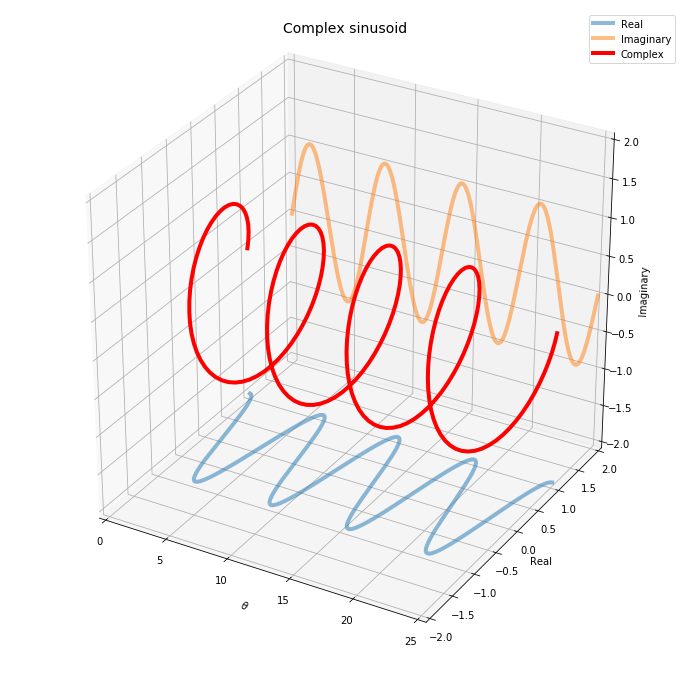

In [10]:
angles = np.linspace(0, 8 * np.pi, 200)
phasors = np.e **(1j * angles)

fig = plt.figure(figsize=(12, 12))
ax = plt.gca(projection='3d')

ax.set_xlim(angles.min(), angles.max())
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')

ax.plot(angles, phasors.real, np.full(phasors.size, -2), linewidth=4, alpha=0.5, label='Real')
ax.plot(angles, np.full(phasors.size, 2), phasors.imag,  linewidth=4, alpha=0.5, label='Imaginary')
ax.plot(angles, phasors.real, phasors.imag, linewidth=4, label='Complex', c='r')
ax.set_title('Complex sinusoid', y=1.04, size=14)
ax.legend()

### Sum and difference of phasors in conjugate symmetry

Taking the conjugate of a real number changes the sign of its imaginary component.  It is just flipped around the x axis.

Adding or subtracting complex numbers is composed of adding or subtracting each of their components. 

In [11]:
(2 + 1j) + (4 + 3j)

(6+4j)

In [12]:
np.conjugate(_)

(6-4j)

Adding complex numbers in conjugate symmetry means adding a complex number with its own conjugate. Their real components combine and their imaginary components cancel.

In [13]:
(2 + 1j) + np.conjugate(2 + 1j)

(4+0j)

Geometrically, this means the x-coordinate doubles and the y-coordinate goes to zero.

A similar argument can be made to show the _difference_ of two complex numbers cancels their real component and combines their imaginary component.

In [14]:
(2 + 1j) - np.conjugate(2 + 1j)

2j

Since

$e^{i\theta} + e^{-i\theta} = 2\cos{\theta}$,

we also have

$\cos{\theta} = \frac{e^{i\theta}}{2} + \frac{e^{-i\theta}}{2}$

Similarly, since

$e^{i\theta} - e^{-i\theta} = 2 i \sin{\theta}$,

we can derive

$\sin{\theta} = i(\frac{e^{i\theta}}{2} - \frac{e^{-i\theta}}{2})$.

One way to interpret this is that _just as a complex phasor contains two sinusoids with $\frac{\pi}{2}$ phase offset, a real sinusoid contains two complex phasors in conjugate symmetry_.

In [15]:
from ipython_animation import create_animation, DEFAULT_FPS

fig = plt.figure(figsize=(8, 17))

animation_length_seconds = 2
num_frames = animation_length_seconds * DEFAULT_FPS

sum_plot = plt.subplot(211)
difference_plot = plt.subplot(212)

def setup_plot(plot, title, phasor, conjugate_phasor):
    plot.cla()
    plot.set_xlim([-2, 2])
    plot.set_ylim([-2, 2])
    plot.set_xlabel('Real')
    plot.set_ylabel('Imag')
    plot.set_title(title, size=14)
    phasor_arrow = plot.arrow(x=0, y=0,
                              dx=phasor.real,
                              dy=phasor.imag,
                              color='b', head_width=0.08,
                              length_includes_head=True)
    conj_phasor_arrow = plot.arrow(x=0, y=0,
                                   dx=conjugate_phasor.real,
                                   dy=conjugate_phasor.imag,
                                   color='r',
                                   head_width=0.08,
                                   length_includes_head=True)
    return phasor_arrow, conj_phasor_arrow

def animate(frame):
    theta = 2 * np.pi * frame / num_frames
    phasor = np.e ** (1j * theta)
    conjugate_phasor = np.conjugate(phasor)
    phasor_arrow, conj_phasor_arrow = setup_plot(sum_plot, 'Sum of conjugate phasors', phasor, conjugate_phasor)

    phasor_sum = phasor + conjugate_phasor
    add_arrow = sum_plot.arrow(x=phasor.real, y=phasor.imag,
                               dx=conjugate_phasor.real,
                               dy=conjugate_phasor.imag,
                               color='r', alpha=0.6, head_width=0.08,
                               length_includes_head=True)  
    sum_arrow = sum_plot.arrow(x=0, y=0,
                               dx=phasor_sum.real,
                               dy=phasor_sum.imag,
                               color='g', alpha=0.8, head_width=0.08,
                               length_includes_head=True)
    sum_plot.legend([phasor_arrow, conj_phasor_arrow, add_arrow, sum_arrow], ['Phasor', 'Conjugate phasor', 'Add', 'Sum'])

    phasor_arrow, conj_phasor_arrow = setup_plot(difference_plot, 'Difference of conjugate phasors', phasor, conjugate_phasor)

    phasor_difference = phasor - conjugate_phasor
    subtract_arrow = difference_plot.arrow(x=phasor.real, y=phasor.imag,
                                           dx=-conjugate_phasor.real,
                                           dy=-conjugate_phasor.imag,
                                           color='r', alpha=0.6, head_width=0.08,
                                           length_includes_head=True)
    difference_arrow = difference_plot.arrow(x=0, y=0,
                               dx=phasor_difference.real + 1e-10, # 0 causes matplotlib error?
                               dy=phasor_difference.imag,
                               color='g', alpha=0.8, head_width=0.08,
                               length_includes_head=True)
    difference_plot.legend([phasor_arrow, conj_phasor_arrow, subtract_arrow, difference_arrow], ['Phasor', 'Conjugate phasor', 'Subtract', 'Difference'])

create_animation(fig, plt, animate, length_seconds=animation_length_seconds)

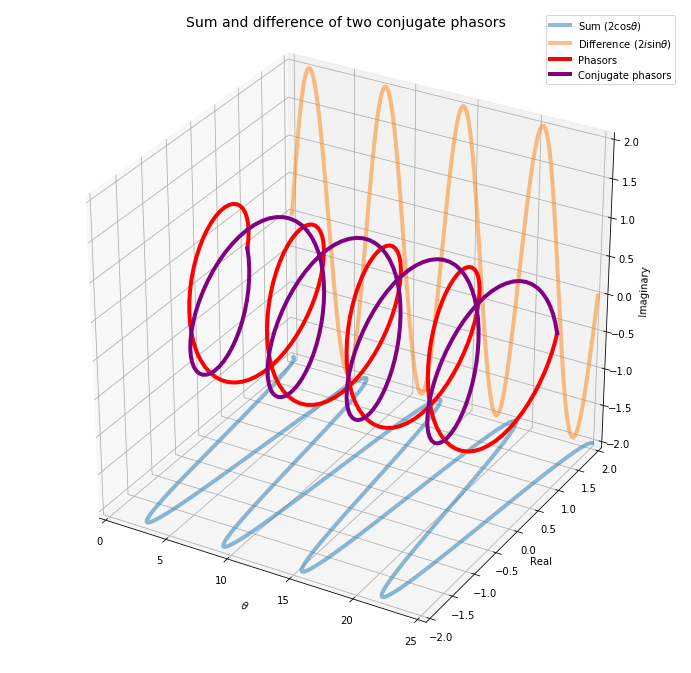

In [16]:
angles = np.linspace(0, 8 * np.pi, 200)
phasors = np.e **(1j * angles)
conjugate_phasors = np.conjugate(phasors)
phasor_sums = phasors + conjugate_phasors
phasor_differences = phasors - conjugate_phasors

fig = plt.figure(figsize=(12, 12))
ax = plt.gca(projection='3d')

ax.set_xlim(angles.min(), angles.max())
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')
ax.plot(angles, phasor_sums.real, np.full(phasors.size, -2), linewidth=4, alpha=0.5, label='Sum ($2\cos \\theta$)')
ax.plot(angles, np.full(phasors.size, 2), phasor_differences.imag,  linewidth=4, alpha=0.5, label='Difference ($2 i \sin \\theta$)')
ax.plot(angles, phasors.real, phasors.imag, linewidth=4, label='Phasors', c='r')
ax.plot(angles, conjugate_phasors.real, conjugate_phasors.imag, linewidth=4, label='Conjugate phasors', c='purple')
ax.set_title('Sum and difference of two conjugate phasors', y=1.05, size=14)
ax.legend()